In [3]:
import numpy as np #calculos cientificos
import pandas as pd #procesamiento de datos
import matplotlib.pyplot as plt

 

In [4]:
df = pd.read_csv('C:/Users/sao/Desktop/Python/Datascience/datasets/Rios.csv', index_col=0)
df

,Millas
Rio,
1,735
2,320
3,325
4,392
5,524
...,...
137,720
138,270
139,430


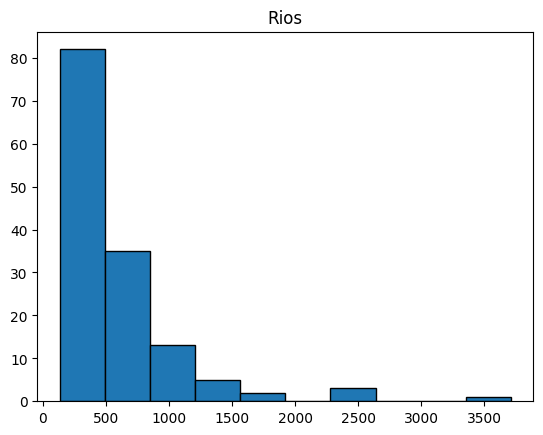

In [5]:
#Generaremos un histograma para ver como estan distribuidos
plt.title('Rios')
plt.hist(df['Millas'], edgecolor = 'black', linewidth=1)
plt.show()

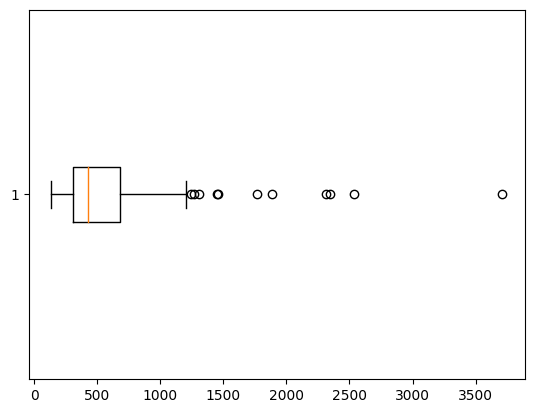

In [6]:
#Hacemos un grafico de caja y bigotes para ver los outliers
plt.boxplot(df['Millas'], vert=False)
plt.show()

In [7]:
#Obtenemos el primer tercer cuartil del conjunto de valores de la columna Millas del objeto rios
Q1 = df['Millas'].quantile(0.25)
print("Primer Cuartil", Q1) # es el primer valor que esta por debajo del 25% de los datos

Q3 = df['Millas'].quantile(0.75)
print("Tercer Cuartil", Q3) # es el tercer valor que esta por debajo del 75% de los datos
#extremo derecho

IQR = Q3 - Q1
print("Rango Intercuartil", IQR) #Sera importante para saber cuales son outliers y cuales no

Mediana = df['Millas'].median()
print("Mediana", Mediana)

Valor_Minimo = df['Millas'].min()
print("Valor Minimo", Valor_Minimo)

Valor_Maximo = df['Millas'].max()
print("Valor Maximo", Valor_Maximo) 

Primer Cuartil 310.0
Tercer Cuartil 680.0
Rango Intercuartil 370.0
Mediana 425.0
Valor Minimo 135
Valor Maximo 3710


In [8]:
BI_calculado = (Q1 - 1.5 * IQR) #Calculo del bigote inferior
print("BI_Calculado ", BI_calculado) #si el valor min es mayor que el BI se dejara en el valor min  

BS_calculado = (Q3 + 1.5 * IQR)#Calculo del bigote superior
print("BS_Calculado ", BS_calculado) #el bigote superior se grafica en 1235

BI_Calculado  -245.0
BS_Calculado  1235.0


In [9]:
#Unicamos las filas en las que se encuentran los outliers
ubicacion_outliers = (df['Millas']<BI_calculado) | (df['Millas']>BS_calculado)
print("Ubicacion de los Outliers", ubicacion_outliers)
ubicacion_outliers.value_counts(True)

Ubicacion de los Outliers Rio
1      False
2      False
3      False
4      False
5      False
       ...  
137    False
138    False
139    False
140    False
141     True
Name: Millas, Length: 141, dtype: bool


Millas
False    0.921986
True     0.078014
Name: proportion, dtype: float64

In [10]:
outliers = df[ubicacion_outliers]
print("Lista de Outliers", outliers)

Lista de Outliers      Millas
Rio        
7      1459
23     1450
25     1243
66     2348
68     3710
69     2315
70     2533
83     1306
98     1270
101    1885
141    1770


In [11]:
Outliers_Ordenados = outliers.sort_values("Millas")
Outliers_Ordenados #Menor a mayor

,Millas
Rio,
25,1243
98,1270
83,1306
23,1450
7,1459
141,1770
101,1885
69,2315
66,2348


In [12]:
#Nos quedamos con los valores que no son Outliers

ubicacion_sin_out = (df['Millas'] >= BI_calculado) & (df['Millas'] <= BS_calculado)
sin_outliers = df[ubicacion_sin_out]
sin_outliers

,Millas
Rio,
1,735
2,320
3,325
4,392
5,524
...,...
136,500
137,720
138,270


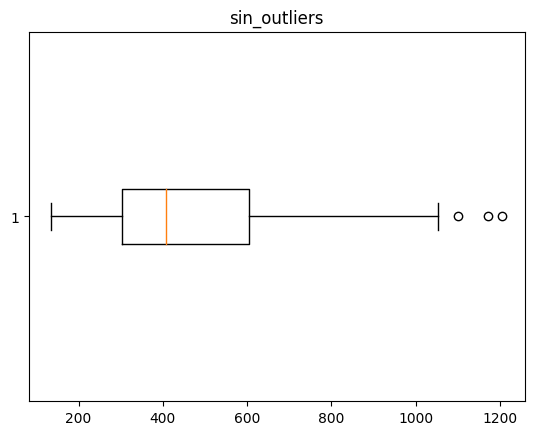

In [13]:
#Hacemos el grafico de caja y bigotes para ver si el objeto "sin_outliers" ya no tiene outliers
plt.title("sin_outliers")
plt.boxplot(sin_outliers["Millas"], vert = False)
plt.show()

In [14]:
#Obtenemos el primer tercer cuartil del conjunto de valores de la columna Millas del objeto rios
Q_1 = sin_outliers['Millas'].quantile(0.25)
print("Primer Cuartil", Q_1) # es el primer valor que esta por debajo del 25% de los datos

Q_3 = sin_outliers['Millas'].quantile(0.75)
print("Tercer Cuartil", Q_3) # es el tercer valor que esta por debajo del 75% de los datos
#extremo derecho

IQ_R = Q_3 - Q_1
print("Rango Intercuartil", IQ_R) #Sera importante para saber cuales son outliers y cuales no

Mediana1 = sin_outliers['Millas'].median()
print("Mediana", Mediana1)

Valor_Minimo1 = sin_outliers['Millas'].min()
print("Valor Minimo", Valor_Minimo1)

Valor_Maximo1 = sin_outliers['Millas'].max()
print("Valor Maximo", Valor_Maximo1) 

Primer Cuartil 302.25
Tercer Cuartil 603.75
Rango Intercuartil 301.5
Mediana 408.5
Valor Minimo 135
Valor Maximo 1205


In [15]:
BI_calculado1 = (Q_1 - 1.5 * IQ_R) #Calculo del bigote inferior
print("BI_Calculado ", BI_calculado1) #si el valor min es mayor que el BI se dejara en el valor min  

BS_calculado1 = (Q_3 + 1.5 * IQ_R)#Calculo del bigote superior
print("BS_Calculado ", BS_calculado1) #el bigote superior se grafica en 1235

BI_Calculado  -150.0
BS_Calculado  1056.0


In [16]:
#Unicamos las filas en las que se encuentran los outliers
ubicacion_outliers1 = (sin_outliers['Millas']<BI_calculado1) | (sin_outliers['Millas']>=BS_calculado1)
print("Ubicacion de los Outliers", ubicacion_outliers1)


Ubicacion de los Outliers Rio
1      False
2      False
3      False
4      False
5      False
       ...  
136    False
137    False
138    False
139    False
140    False
Name: Millas, Length: 130, dtype: bool


In [17]:
outliers1 = sin_outliers[ubicacion_outliers1]
print("Lista de Outliers", outliers1)

Lista de Outliers      Millas
Rio        
67     1171
114    1100
115    1205


In [18]:
Outliers_Ordenados1 = outliers1.sort_values("Millas")
Outliers_Ordenados1 #Menor a mayor

,Millas
Rio,
114,1100
67,1171
115,1205


In [19]:
ubicacion_sin_out1 = (sin_outliers['Millas'] >= BI_calculado1) & (sin_outliers['Millas'] <  BS_calculado1)
sin_outliers_Definitivo = sin_outliers[ubicacion_sin_out1]
sin_outliers_Definitivo

,Millas
Rio,
1,735
2,320
3,325
4,392
5,524
...,...
136,500
137,720
138,270


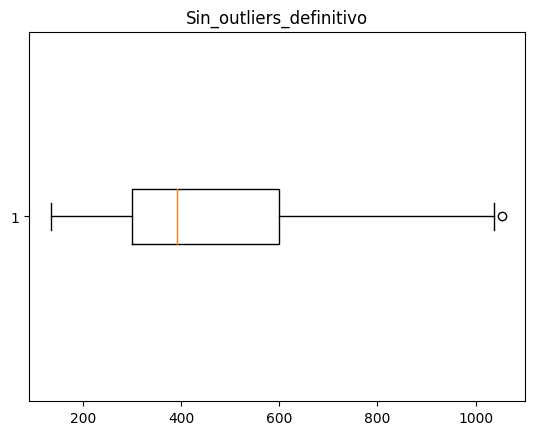

In [20]:
plt.title("Sin_outliers_definitivo")
plt.boxplot(sin_outliers_Definitivo,vert=False)
plt.show()

In [21]:
sin_outliers_Definitivo.iloc[115]

Millas    215
Name: 129, dtype: int64